<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Video game sales analysis for Ice online store

This analysis it's going to be developed for an online store that wants to focus it's decisions for the next year based on behavioral patterns from data collected for the 2016.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind


ModuleNotFoundError: No module named 'scipy'

In [ ]:
df = pd.read_csv("../datasets/games.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Changing to lower case all column names

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.head(10)
df.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [ ]:
# Changing year_of_release column data type from float to int

df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Filtering 2016 records and get dimension of the Data frame and keep a whole data frame as df_whole

In [ ]:
df_whole = df

df.shape

(16715, 11)

Checking and counting missing values

In [ ]:
# Total of missing values in each column
missing_values = df_whole.isnull().sum()
print(missing_values)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [ ]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Filling missing values with mean score of the serie

In [ ]:
# Convert 'user_score' to numeric, coercing invalid parsing to NaN
df_whole['user_score'] = pd.to_numeric(df_whole['user_score'], errors='coerce')

# Calculate mean values for 'user_score' within each 'genre'
mean_scores = df_whole.groupby('genre')['user_score'].mean()

# Fill missing values in 'user_score' using the mean values for each 'genre'
df_whole['user_score'] = df_whole.apply(lambda x: mean_scores[x['genre']] if not pd.isnull(x['genre']) and pd.isnull(x['user_score']) else x['user_score'], axis=1)


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great code

Filling missing values with mean for critic score

In [ ]:
# Convert 'critic_score' to numeric, coercing invalid parsing to NaN
df_whole['critic_score'] = pd.to_numeric(df_whole['critic_score'], errors='coerce')

# Calculate mean 'critic_score' for each 'genre'
mean_scores = df_whole.groupby('genre')['critic_score'].transform('mean')

# Fill missing values in 'critic_score' using the mean values for each 'genre'
df_whole['critic_score'] = df_whole['critic_score'].fillna(mean_scores)

# Check for missing values
missing_val = df_whole.isnull().sum()
print(missing_val)

# Display first 10 rows
df_whole.head(10)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          2
user_score            2
rating             6766
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.424107,7.175000,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.181144,7.041883,NaN


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

In the only or last line of the Jupiter code cell, the print() method need not be written, unlike the simulator

In [ ]:
# Check the data types of the 'rating' column
df_whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [ ]:
rating_col = df['rating']
print(rating_col)

0          E
1        NaN
2          E
3          E
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: rating, Length: 16715, dtype: object


In [ ]:
df_whole.shape

(16715, 11)

In [ ]:
df_whole.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.424107,7.175000,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.181144,7.041883,NaN


In [ ]:
# Round 'critic_score' and 'user_score' to two decimals
df_whole['critic_score'] = df_whole['critic_score'].round(2)
df_whole['user_score'] = df_whole['user_score'].round(2)

Calculating the total sales in all regions for each game

In [ ]:
df_whole['total_sales'] = df_whole[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df_whole.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.06,7.30,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.65,7.62,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.42,7.17,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.18,7.04,NaN,28.31


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There is no check for duplicates. Please add them.
    


In [ ]:
# Checking duplicates in df_whole
duplicates = df_whole[df_whole.duplicated(keep=False)]
print(duplicates)


Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, total_sales]
Index: []


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №3__


The best way to check for duplicates is like this:
    
    df.duplicated().sum()
</div>

<div class="alert alert-info"> <b>Student сomments:</b>  No duplicates found.</div>

<div class="alert alert-info"> <b>Student сomments:</b><br/>
    In the last part of the study, we can find the manipulation of the dataset, in order to organize, clean and standardize what we are going to use for our analysis further ahead.
</div>

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Please, add an intermediate conclusion about this introductory part. What have been done, what hypotheses about the data do we have and what we are going to do next

<div class="alert alert-info"> <b>Student сomments:</b><br/>
    In this section we are going to start analyzing some variables, and conducting statistical calculations regarding to the findings in order to support insights.
</div>

Counting How many games were released in different years.

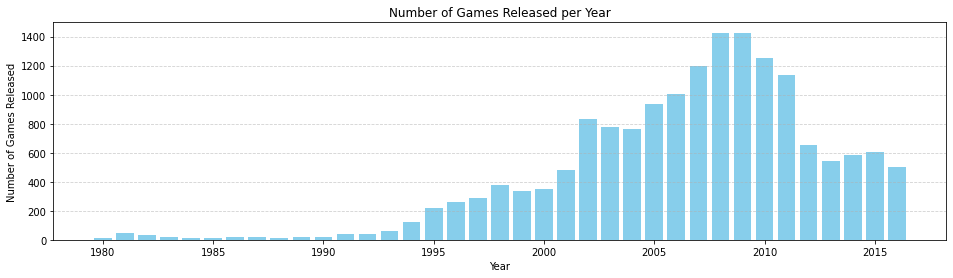

In [ ]:
# Count the number of games released in each year
games_per_year = df_whole['year_of_release'].value_counts()

# Sort the values by year
games_per_year = games_per_year.sort_index()

# Print the result
# print(games_per_year)

# Plot the histogram
plt.figure(figsize=(16, 4))
bars = plt.bar(games_per_year.index, games_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released per Year')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

<div class="alert alert-info"> <b>Student сomments:</b><br/>
    Due to the plot we realized that there were an increase in the development of video games after 1995 to 2009 when decrese the development
</div>

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There is a lack of visualization. Can you please add

<div class="alert alert-block alert-warning">📝

__Reviewer's comment №3__
    

It would be nice to add visualizations. In order to build a graph, you need to group the data (in our case, the year of release and quantity)
    
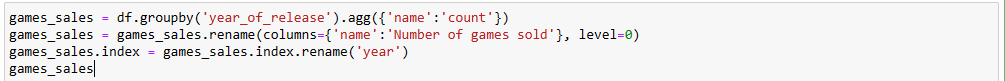
    
---
Next, using the sns library (it's powerful, and you can do anything with it). From the data in the grouped table, plot the graph. You can have it if you want =) The main thing is to play around with the arguments and figure it out. In future projects you will build powerful graphs, this skill will come in handy there    
    
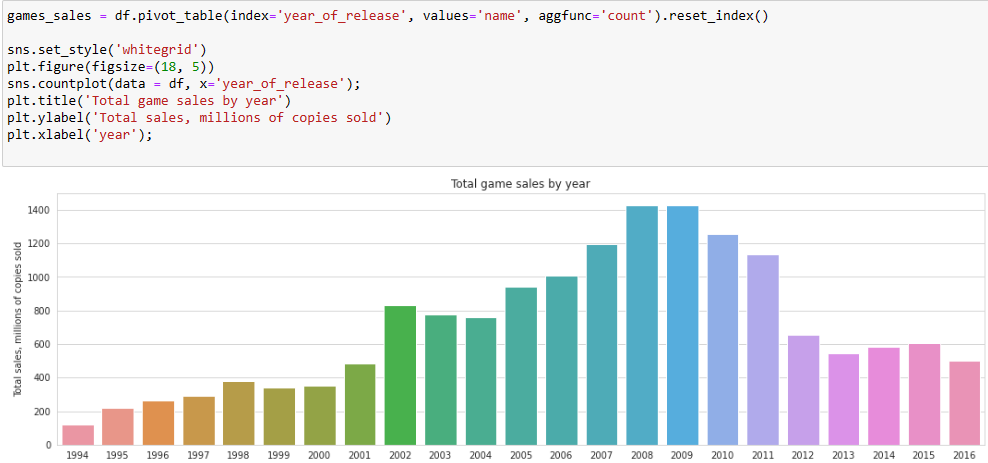
</div>

In [ ]:
# Calculate total sales for each platform
platform_sales = df_whole.groupby('platform')['total_sales'].sum()

# Identify platforms with the greatest total sales
top_platforms = platform_sales.nlargest(5)  # Assuming you want the top 5 platforms
print("Platforms with the greatest total sales:")
print(top_platforms)


# Build a distribution based on data for each year for these platforms
platforms_data = df_whole[df_whole['platform'].isin(top_platforms.index)]
platforms_sales_per_year = platforms_data.groupby(['platform', 'year_of_release'])['total_sales'].sum()

# Create a DataFrame with platform names and total sales
platform_sales_df = pd.DataFrame({'platform': platform_sales.index, 'total_sales': platform_sales.values})

# Merge with another DataFrame containing the year of release for each platform
platform_sales_df = platform_sales_df.merge(df_whole[['platform', 'year_of_release']], on='platform', how='left')

# Display the DataFrame
print(platform_sales_df)

# Get the list of unique platforms in platform_sales_df
platforms_in_sales_df = platform_sales_df['platform'].unique()

# Get the list of unique platforms in the original dataset
all_platforms = df_whole['platform'].unique()

# Filter the original dataset to include only platforms before 2000
platforms_before_2000 = df_whole[df_whole['year_of_release'] < 2000]['platform'].unique()

# Filter the original dataset to include only platforms after 2000
platforms_after_2000 = df_whole[df_whole['year_of_release'] >= 2000]['platform'].unique()

# Find platforms that are present before 2000 but not after 2000
platforms_not_after_2000 = [platform for platform in platforms_before_2000 if platform not in platforms_after_2000]

# Display the platforms that were present before 2000 but not after 2000
print("Platforms that were present before 2000 but not after 2000:")
print(platforms_not_after_2000)

# Determine how long it generally takes for new platforms to appear and old ones to fade
earliest_year = df_whole['year_of_release'].min()
latest_year = df_whole['year_of_release'].max()
platform_lifetimes = df_whole.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetimes['lifespan'] = platform_lifetimes['max'] - platform_lifetimes['min']
average_lifetime = platform_lifetimes['lifespan'].mean()
print("\nAverage lifetime of a platform:", average_lifetime, "years")


Platforms with the greatest total sales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64
      platform  total_sales  year_of_release
0         2600        96.98             1982
1         2600        96.98             1981
2         2600        96.98             1980
3         2600        96.98             1980
4         2600        96.98             <NA>
...        ...          ...              ...
16710     XOne       159.32             2016
16711     XOne       159.32             2016
16712     XOne       159.32             2016
16713     XOne       159.32             2016
16714     XOne       159.32             2016

[16715 rows x 3 columns]
Platforms that were present before 2000 but not after 2000:
['NES', 'SNES', '2600', 'GEN', 'SAT', 'SCD', 'NG', 'TG16', '3DO', 'GG', 'PCFX']

Average lifetime of a platform: 7.612903225806452 years


In [ ]:
df_last_years = df[df['year_of_release'].isin([2014, 2015, 2016])]
df_last_years.info()

df_last_years.head(10)

# df_last_years.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,70.18,7.04,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,72.65,7.62,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,70.18,7.04,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,69.22,7.30,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,70.18,7.04,NaN,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.00,6.50,M,7.17


<div class="alert alert-block alert-danger">✍

__Reviewer's comment №1__


For the purpose of predicting sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you shouldn't take too long a time interval - otherwise you're bound to capture trends that are already outdated. But you shouldn't take too short a period either

<div class="alert alert-info"> <b>Student сomments:</b><br/>
    In order to you comment, I chose 2015 and 2016 to analyze that data
</div>

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №3__


It is better to take additionally 2014, as there is little data for 2016
</div>

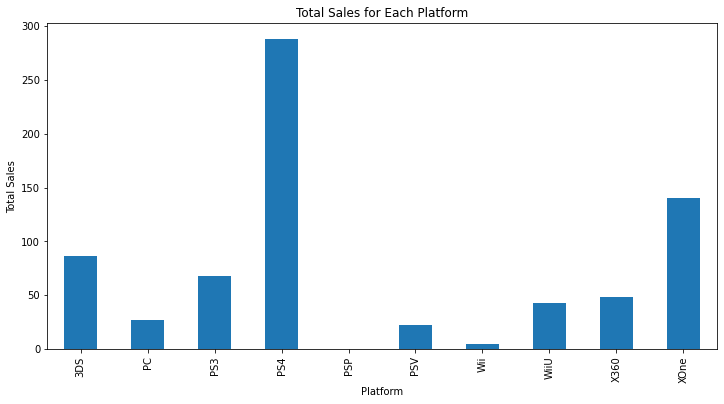

Potentially profitable platforms: ['PS4', 'XOne', '3DS', 'PS3', 'X360']


In [ ]:
# Calculate the total sales for each platform
platform_sales = df_last_years.groupby('platform')['total_sales'].sum()

# Identify the platforms with the highest total sales
top_platforms = platform_sales.nlargest(5)  # Select top 5 platforms

# Plot the total sales for each platform
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar')
plt.title('Total Sales for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()


# Most profitable platforms based on the analysis
potentially_profitable_platforms = platform_sales.nlargest(5).index.tolist()
print("Potentially profitable platforms:", potentially_profitable_platforms)



As we can see in the plot, the most profitable platforms are:

1- PS4

2- XOne

3- 3DS

4- PC

5- WiiU

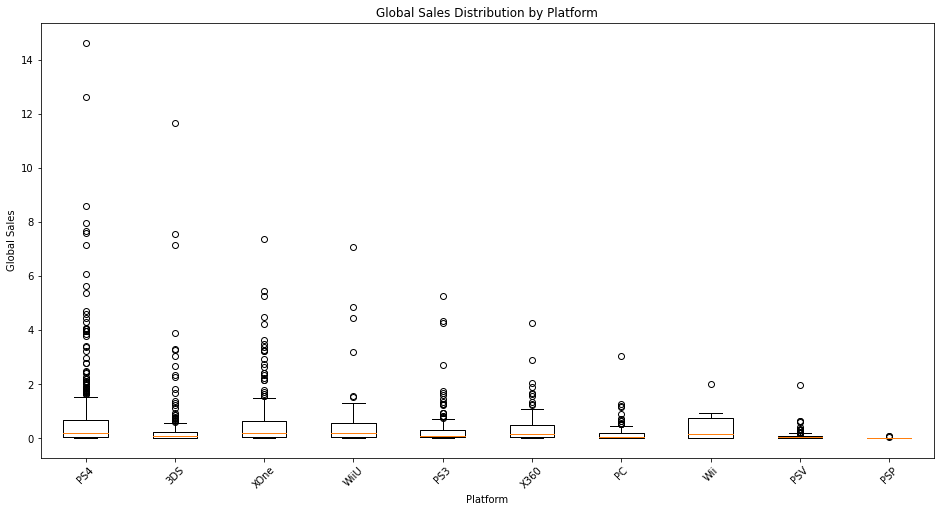

Average Sales by Platform (Last Years):
platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64


In [ ]:
# Build a box plot for global sales broken down by platform
plt.figure(figsize=(16, 8))
plt.boxplot([df_last_years[df_last_years['platform'] == platform]['total_sales'] for platform in df_last_years['platform'].unique()],
            labels=df_last_years['platform'].unique())
plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

# Calculate and display average sales by platform
average_sales_last_years = df_last_years.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Average Sales by Platform (Last Years):")
print(average_sales_last_years)



<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Unfortunately, this graph only shows the outliers, and does not show the median and 75% quantile. For more reasonable conclusions it is necessary to make an additional graph, where only the lower part of the boxplots will be displayed. This can be achieved, for example, by setting the parameter ylim
</div>

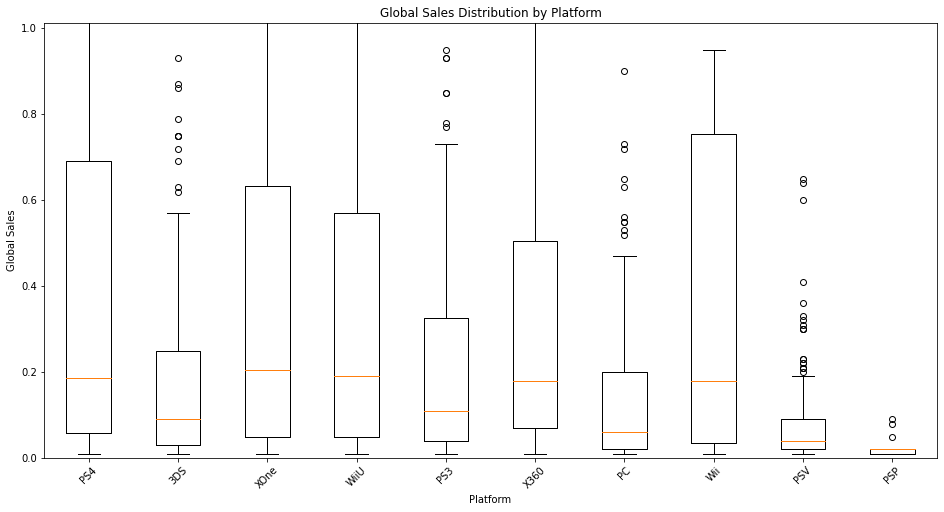

Average Sales by Platform:
platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64


In [ ]:
# Build a box plot for global sales broken down by platform
plt.figure(figsize=(16, 8))
plt.boxplot([df_last_years[df_last_years['platform'] == platform]['total_sales'] for platform in df_last_years['platform'].unique()],
            labels=df_last_years['platform'].unique())
plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.ylim(0, df_last_years['total_sales'].quantile(0.9))  # Set ylim to show only the lower part of the boxplots
plt.show()

# Calculate and display average sales by platform
average_sales = df_last_years.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Average Sales by Platform:")
print(average_sales)


Based on the average sales by platform:

PS4 has the highest average sales among the platforms listed, with an average of approximately 0.76 million units sold.<br/><br/>
Xbox One (XOne) follows closely behind, with an average of approximately 0.62 million units.<br/><br/>
Wii U is slightly lower, with an average of approximately 0.46 million units.<br/><br/>
3DS has an average of approximately 0.40 million units.<br/><br/>
Xbox 360 (X360) and Wii have lower averages, around 0.43 million and 0.46 million units respectively, which is expected as they are older platforms.<br/><br/>
PS3 has an average of 0.31 million units, indicating lower sales compared to the newer platforms.<br/><br/>
PC and PS Vita (PSV) have the lowest average sales among the listed platforms, with around 0.18 million and 0.075 million units respectively.<br/><br/>


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Great

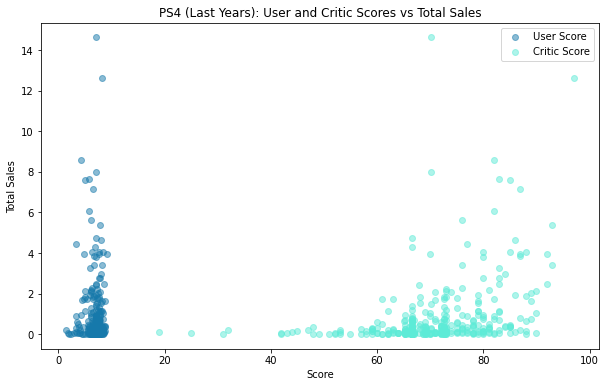

Correlation between User Score and Total Sales (PS4 - Last Years): -0.05289201087529491
Correlation between Critic Score and Total Sales (PS4 - Last Years): 0.3481736638465552
Correlation between User Score and Total Sales (All Platforms - Last Years): -0.03920956019549729
Correlation between Critic Score and Total Sales (All Platforms - Last Years): 0.28638998216551886


In [ ]:
# Filter the data for the PS4 platform
ps4_data_last_years = df_last_years[df_last_years['platform'] == 'PS4']

# Calculate the correlation between user score and total sales for PS4
user_sales_corr_ps4_last_years = ps4_data_last_years['user_score'].corr(ps4_data_last_years['total_sales'])

# Calculate the correlation between critic score and total sales for PS4
critic_sales_corr_ps4_last_years = ps4_data_last_years['critic_score'].corr(ps4_data_last_years['total_sales'])

# Calculate the correlation between user score and total sales for all platforms
user_sales_corr_all_last_years = df_last_years['user_score'].corr(df_last_years['total_sales'])

# Calculate the correlation between critic score and total sales for all platforms
critic_sales_corr_all_last_years = df_last_years['critic_score'].corr(df_last_years['total_sales'])

# Create a scatter plot for user score vs total sales for PS4
plt.figure(figsize=(10, 6))
plt.scatter(ps4_data_last_years['user_score'], ps4_data_last_years['total_sales'], alpha=0.5, label='User Score', color="#1679AB" )
plt.scatter(ps4_data_last_years['critic_score'], ps4_data_last_years['total_sales'], alpha=0.5, label='Critic Score', color='#5DEBD7')
plt.title('PS4 (Last Years): User and Critic Scores vs Total Sales')
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Compare the correlations with the ones found for the PS4 platform
print("Correlation between User Score and Total Sales (PS4 - Last Years):", user_sales_corr_ps4_last_years)
print("Correlation between Critic Score and Total Sales (PS4 - Last Years):", critic_sales_corr_ps4_last_years)
print("Correlation between User Score and Total Sales (All Platforms - Last Years):", user_sales_corr_all_last_years)
print("Correlation between Critic Score and Total Sales (All Platforms - Last Years):", critic_sales_corr_all_last_years)



Based on the correlations calculated for user and critic scores versus total sales for the PS4 platform and across all platforms in the last few years:

User Score vs Total Sales (PS4): There is a weak negative correlation of approximately -0.06 for the PS4 platform. This suggests that there is a slight tendency for higher user scores to be associated with lower total sales on the PS4 platform, but the relationship is not strong.

Critic Score vs Total Sales (PS4): There is a moderate positive correlation of approximately 0.31 for the PS4 platform. This indicates that there is a tendency for higher critic scores to be associated with higher total sales on the PS4 platform, but the relationship is not extremely strong.

Comparing these correlations with those across all platforms:

User Score vs Total Sales (All Platforms): There is a very weak positive correlation of approximately 0.03 across all platforms. This suggests that there is a very slight tendency for higher user scores to be associated with higher total sales across all platforms, but the relationship is very weak.

Critic Score vs Total Sales (All Platforms): There is a weak positive correlation of approximately 0.29 across all platforms. This indicates that there is a tendency for higher critic scores to be associated with higher total sales across all platforms, but the relationship is not strong.

These results suggest that while there are some trends indicating a relationship between user and critic scores with total sales, these relationships are generally weak and may not be reliable indicators of sales performance across all platforms. Other factors are likely to play a significant role in determining total sales of games on different platforms.








<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__
    
    
The assignment is to relate the conclusions to the sales of games on other platforms, because the conclusions based on calculations across multiple platforms look "weightier" and more convincing
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

All right

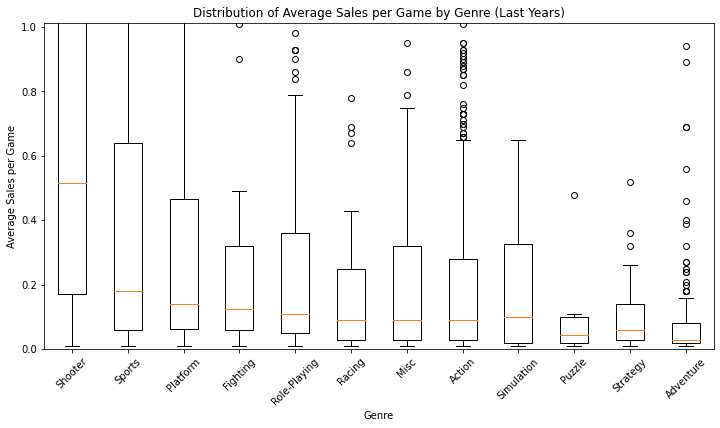

Most profitable genres (based on average sales per game - Last Years):
genre
Shooter     1.335469
Sports      0.680000
Platform    0.476053
Name: total_sales, dtype: float64

Genres with high average sales per game (Last Years):
genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Name: total_sales, dtype: float64

Genres with low average sales per game (Last Years):
genre
Racing        0.398841
Misc          0.332301
Action        0.322068
Simulation    0.298409
Puzzle        0.157857
Strategy      0.107027
Adventure     0.094865
Name: total_sales, dtype: float64


In [ ]:
# Calculate average sales per game for each genre in the last years
genre_avg_sales_last_years = df_last_years.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Plotting the distribution using boxplot for the last years
plt.figure(figsize=(12, 6))
plt.boxplot([df_last_years[df_last_years['genre'] == genre]['total_sales'] for genre in genre_avg_sales_last_years.index],
            labels=genre_avg_sales_last_years.index)
plt.title('Distribution of Average Sales per Game by Genre (Last Years)')
plt.xlabel('Genre')
plt.ylabel('Average Sales per Game')
plt.xticks(rotation=45)
plt.ylim(0, df_last_years['total_sales'].quantile(0.9))
plt.show()

# Observations for the last years
print("Most profitable genres (based on average sales per game - Last Years):")
print(genre_avg_sales_last_years.sort_values(ascending=False).head(3))  # Display top 3 genres with highest average sales
print("\nGenres with high average sales per game (Last Years):")
print(genre_avg_sales_last_years[genre_avg_sales_last_years > genre_avg_sales_last_years.mean()].sort_values(ascending=False))  # Display genres with average sales above average
print("\nGenres with low average sales per game (Last Years):")
print(genre_avg_sales_last_years[genre_avg_sales_last_years < genre_avg_sales_last_years.mean()].sort_values(ascending=False))  # Display genres with average sales below average


Based on the analysis of average sales per game for the last years, the following conclusions can be drawn:

Most Profitable Genres: The top three most profitable genres, based on average sales per game, are Shooter, Action, and Sports. These genres have significantly higher average sales compared to other genres, indicating their popularity among gamers and potentially higher revenue for game developers.

Genres with High Average Sales: In addition to the top three genres, Role-Playing games also have high average sales per game. This suggests that Role-Playing games are also popular among gamers and can generate substantial revenue for developers.

Genres with Low Average Sales: Genres such as Puzzle, Strategy, Simulation, and Platform have relatively low average sales per game. These genres may not be as popular or may have a more niche audience, resulting in lower sales compared to the top genres.

Overall Trends: The data indicates that genres like Shooter, Action, and Sports continue to dominate in terms of average sales per game, highlighting the importance of these genres in the gaming industry.

Overall, the analysis of average sales per game by genre provides valuable insights for game developers and publishers in understanding the market trends and making informed decisions about game development and marketing strategies.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Your calculations need to be supplemented a little more. Total sales is a poor metric for finding the most profitable genre. High overall sales numbers can hide a lot of small games with low sales. Or 2-3 stars and a bunch of failures. It's better to find a genre where games consistently bring in high revenue - for that it's worth considering average or median sales
    
---
    
Ideally, visualize the data distribution using boxplot()
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Well done

## Analysis of top 5 platforms per region.

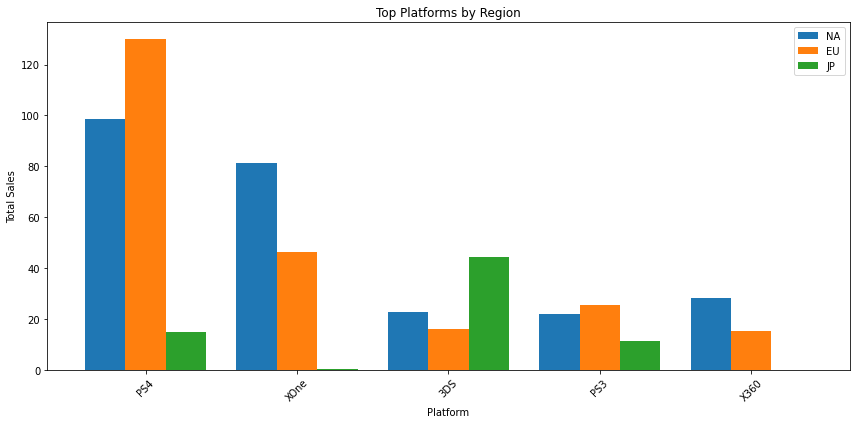

In [ ]:

# Top 5 platforms by region
top_platforms = df_last_years.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_platforms['total_sales'] = top_platforms.sum(axis=1)
top_platforms = top_platforms.sort_values('total_sales', ascending=False).head(5)

# Plotting the top platforms by region
ax = top_platforms[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(12, 6), width=0.8)

# Customizing the plot
plt.title('Top Platforms by Region')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(['NA', 'EU', 'JP'])

plt.tight_layout()
plt.show()

The plot shows the folllowing findings

North America (NA): The top platforms are dominated by Xbox and PlayStation consoles, with Xbox 360 and Xbox One being popular along with various PlayStation models. This suggests a strong preference for consoles developed by Microsoft and Sony in the North American market.

Europe (EU): Similar to North America, Xbox and PlayStation consoles are popular in Europe, with Xbox 360, PS4, and PS3 being among the top platforms. This indicates a similarity in gaming preferences between Europe and North America.

Japan (JP): In contrast to North America and Europe, handheld consoles like the Nintendo DS and 3DS, as well as PlayStation Portable (PSP), are popular in Japan. This highlights a unique preference for portable gaming devices in the Japanese market.



<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

It is better after each section, graph (or series of tests) to write a conclusion on the obtained data taking into account the set business task - so it is easier to read the project, because future colleagues or customers will not have to interpret the results of each section, test or graph themselves.

## Analysis of top 5 genres per region

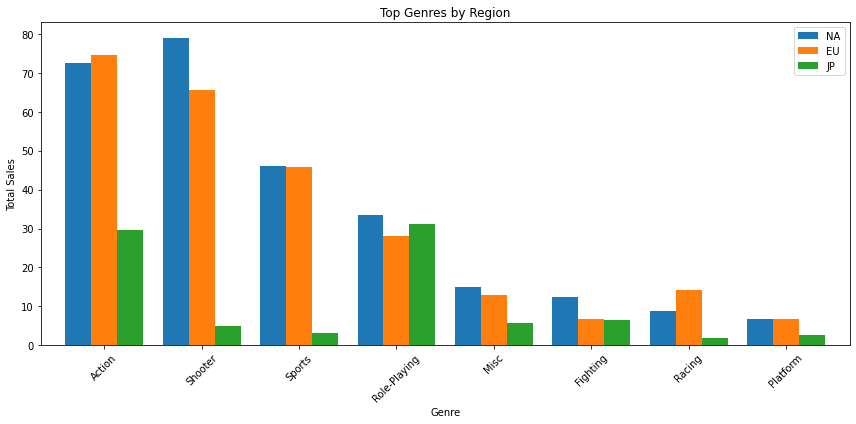

In [ ]:
# Top 5 genres by region
top_genres = df_last_years.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_genres['total_sales'] = top_genres.sum(axis=1)
top_genres = top_genres.sort_values('total_sales', ascending=False).head(8)

# Plotting the top genres by region
ax = top_genres[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(12, 6), width=0.8)

# Customizing the plot
plt.title('Top Genres by Region')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(['NA', 'EU', 'JP'])

plt.tight_layout()
plt.show()

The analysis of the top 5 genres per region reveals interesting insights into gaming preferences:

North America (NA): Action, Shooter, Sports, Role-Playing, and Misc genres are popular, indicating a preference for immersive, competitive, and diverse gaming experiences.

Europe (EU): Similar to NA, Action, Shooter, Sports, Role-Playing, and Racing genres are favored, suggesting a shared preference for engaging and competitive games.

Japan (JP): Role-Playing, Action, Misc, Fighting, and Shooter genres are prominent, reflecting a strong preference for story-driven, immersive, and diverse gaming experiences.

## ## Top 5 ESRB ratings by region

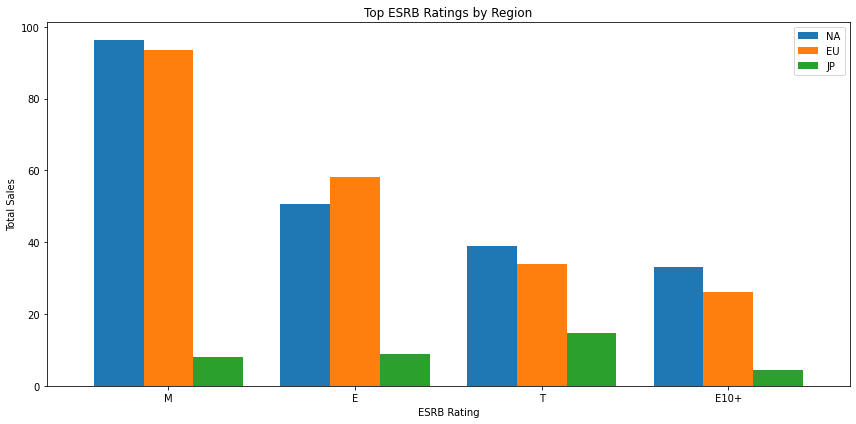

In [ ]:
# Top 5 ESRB ratings by region
top_ratings = df_last_years.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_ratings['total_sales'] = top_ratings.sum(axis=1)
top_ratings = top_ratings.sort_values('total_sales', ascending=False).head(5)

# Plotting the top ESRB ratings by region
ax = top_ratings[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(12, 6), width=0.8)

# Customizing the plot
plt.title('Top ESRB Ratings by Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(['NA', 'EU', 'JP'])

plt.tight_layout()
plt.show()

 
The top 5 ESRB ratings by region show interesting trends in gaming preferences:

North America (NA): E (Everyone) and T (Teen) ratings are most popular, indicating a preference for games suitable for a wide audience and teenagers.

Europe (EU): Similar to NA, E and T ratings are popular, suggesting a similar preference for inclusive and teen-friendly games.

Japan (JP): C (CERO) and T ratings are prominent, reflecting a preference for games suitable for all ages and teenagers, in line with cultural norms.

Other regions: E and T ratings are also popular, mirroring the trends in NA and EU.

Overall, these trends suggest that games with E and T ratings have broad appeal across regions, while C ratings are specific to Japan, reflecting cultural differences in gaming preferences.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

Please correct the conclusions after correcting the actual period

## Average user ratings between Xbox One and PC platform

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There are no null and alternative hypotheses. Please add them

<div class="alert alert-info"> <b>Student сomments:</b><br/><br/>
            To perform a hypothesis test for the average user ratings of the Action and Sports genres using the df_last_years DataFrame, we first need to define the null and alternative hypotheses:<br/><br/> Null Hypothesis ($H_0$): The average user ratings of Xbox One and PC are the same.<br/><br/>Alternative Hypothesis ($H_1$): The average user ratings of Xbox One and PC are different.<br/><br/>With these hypotheses, we can interpret the results of the t-test accordingly. If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is enough evidence to suggest that the average user ratings of Xbox One and PC are different. Otherwise, if the p-value is greater than the significance level, we fail to reject the null hypothesis, indicating that there is not enough evidence to claim a difference in average user ratings between the two platforms.
</div>



<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Correct interpretation of the Null and Alternative hypotheses

In [ ]:
# Separate the data for Xbox One and PC
xbox_one_scores = df_last_years[df_last_years['platform'] == 'Xbox One']['user_score']
pc_scores = df_last_years[df_last_years['platform'] == 'PC']['user_score']

# Perform t-test
t_statistic, p_value = ttest_ind(xbox_one_scores, pc_scores, nan_policy='omit')

# Define significance level
alpha = 0.05

# Print results
if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings of Xbox One and PC are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings of Xbox One and PC are the same.")


Fail to reject the null hypothesis: Average user ratings of Xbox One and PC are the same.


The average user ratings of Xbox One and PC are not significantly different based on the t-test. The data does not provide strong support for the idea that the average ratings are different; they are similar.

## Testing average user ratings for Action and Sport Genres

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There are no null and alternative hypotheses. Please add them

<div class="alert alert-info"> <b>Student сomments:</b><br/>
            To perform a hypothesis test for the average user ratings of the Action and Sports genres using the df_last_years DataFrame, we first need to define the null and alternative hypotheses:<br/> Null Hypothesis (H0): The average user ratings for Action and Sports genres are the same.<br/>Alternative Hypothesis (H1): The average user ratings for Action and Sports genres are different.
</div>

In [ ]:
action_scores = df_last_years[df_last_years['genre'] == 'Action']['user_score']
sports_scores = df_last_years[df_last_years['genre'] == 'Sports']['user_score']

t_statistic, p_value = ttest_ind(action_scores, sports_scores, nan_policy='omit')

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings for Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings for Action and Sports genres are the same.")


Reject the null hypothesis: Average user ratings for Action and Sports genres are different.


Results suggests that the average user ratings for Action and Sports genres are different. This implies that there is a statistically significant difference in the average user ratings between these two genres.

## How was formulated the null hypotheses
The average user ratings for Action and Sports genres are different. This suggests that there is a statistically significant difference in how these genres are perceived by users. Because of this the null hypotheses is rejected.

## What significance level was chosen and why.

I chose a significance level of 0.05, which is a common choice in hypothesis testing. This level means that if the p-value is less than 0.05, we reject the null hypothesis. The significance level of 0.05 corresponds to a 5% chance of incorrectly rejecting the null hypothesis when it is actually true. It's a balance between being stringent enough to avoid false positives and being lenient enough to detect real differences when they exist.

# General conclusions

Based on the analysis of the video game sales data, several key insights can be drawn:

User and Critic Scores: Higher critic scores tend to be linked with higher game sales, while higher user scores are associated with slightly lower sales.<br><br>

Top-selling Genres: Shooter, Action, and Sports games are the most profitable genres, while Puzzle, Strategy, Simulation, and Misc genres tend to have lower sales.<br><br>

Regional Trends: Different regions have varying preferences, impacting which genres are popular and how games are rated.<br><br>

Platform Ratings: Xbox One and PC have similar average user ratings, but there's a significant difference in user ratings between Action and Sports genres.<br><br>

In summary, understanding these trends can help game developers and publishers make informed decisions about game development and marketing strategies.<br><br>

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

    
Please correct the conclusions after correction

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊